## Curva ROC y AUC

In [1]:
# librerias
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Datos
np.random.seed(4)

X, y = datasets.load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scaling data
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


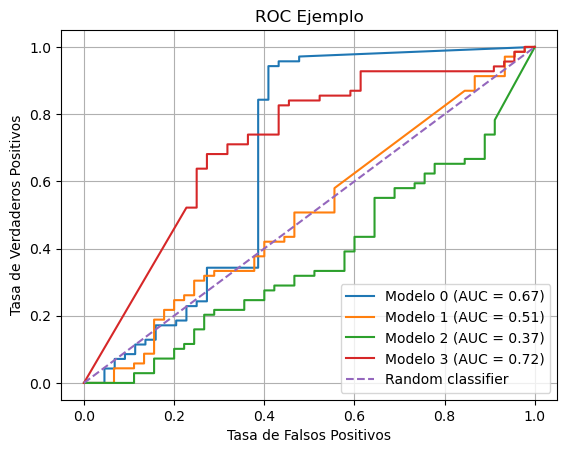

In [3]:
skf = StratifiedKFold(n_splits=4)

logThr = []
logTPR = []
logFPR = []


i = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    modelo = neural_network.MLPClassifier(
        hidden_layer_sizes=(2),
        activation='relu',
        learning_rate_init=0.001,
        max_iter=20,
        solver='sgd'
        )
    
    prob = modelo.fit(X_train_fold, y_train_fold).predict_proba(X_test_fold)
    
    # Calcular ROC  y area bajo la curva
    fpr, tpr, thresholds = roc_curve(y_test_fold, prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr,label='Modelo %d (AUC = %0.2f)' % (i, roc_auc))
    
    logThr.append(thresholds)
    logTPR.append(tpr)
    logFPR.append(fpr)
    
    i+=1
    

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0,1], [0,1], linestyle='--', label='Random classifier')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Ejemplo')
plt.legend(loc="lower right")
plt.grid()
plt.show()

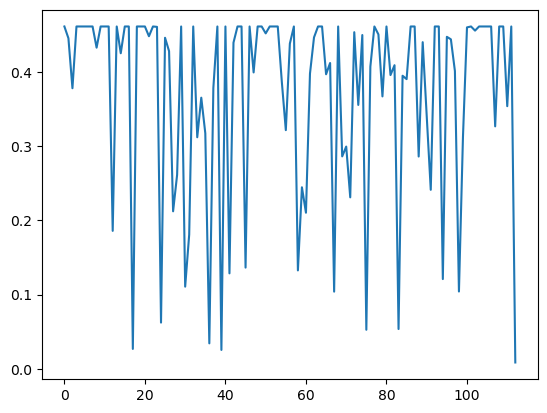

In [4]:
plt.plot(prob[:,1])

In [5]:
prob.shape

(113, 2)

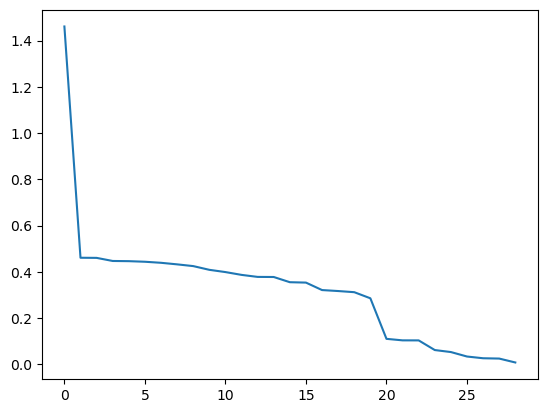

In [6]:
plt.plot(thresholds)

In [7]:
thresholds[0]

1.4612569297196383

In [13]:
thresholds[0:20]

array([1.46125693, 0.46125693, 0.46073924, 0.44730858, 0.44650527,
       0.44396813, 0.43943833, 0.43268763, 0.42518433, 0.40907682,
       0.39932669, 0.38719359, 0.37844363, 0.3780385 , 0.35551334,
       0.35383674, 0.32153546, 0.31733778, 0.31236414, 0.28599601])

In [14]:
tpr[0:20]

array([0.        , 0.52173913, 0.52173913, 0.63768116, 0.63768116,
       0.68115942, 0.68115942, 0.71014493, 0.71014493, 0.73913043,
       0.73913043, 0.82608696, 0.82608696, 0.84057971, 0.84057971,
       0.85507246, 0.85507246, 0.86956522, 0.86956522, 0.92753623])

In [15]:
fpr[0:20]

array([0.        , 0.22727273, 0.25      , 0.25      , 0.27272727,
       0.27272727, 0.31818182, 0.31818182, 0.36363636, 0.36363636,
       0.43181818, 0.43181818, 0.45454545, 0.45454545, 0.52272727,
       0.52272727, 0.59090909, 0.59090909, 0.61363636, 0.61363636])